<a href="https://colab.research.google.com/github/realalyeasin/-Customer-Segmentation-I-I-Visualization-/blob/main/%F0%9F%9B%92Customer_Segmentation_I_I_Visualization%F0%9F%9B%8D%EF%B8%8F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings 
warnings.simplefilter('ignore')

plt.style.use("dark_background")

In [7]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

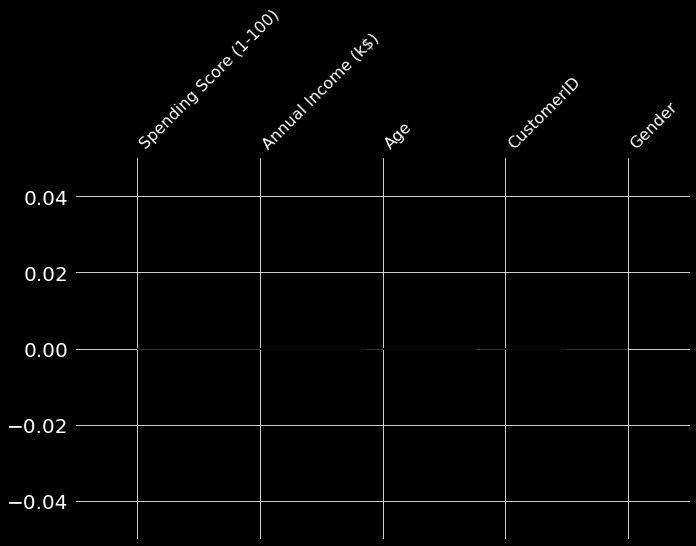

In [10]:
msno.dendrogram(df, figsize=(11,7))
plt.grid()

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**EDA**

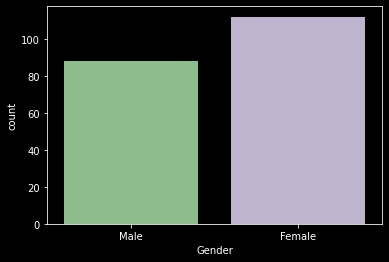

In [12]:
sb.countplot(df['Gender'], saturation=.66, palette='Accent')

In [13]:
income = px.bar(df, x="Annual Income (k$)", y="Spending Score (1-100)", template="plotly_dark")
income.update_layout(title_text="Spending Score against Annual Income")
income.show()

Text(0.5, 1.0, 'Ages')

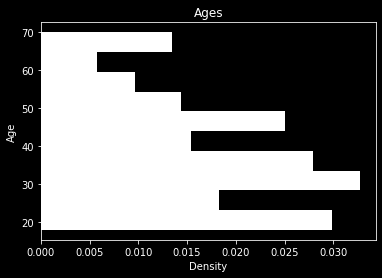

In [14]:
plt.hist(df['Age'], density=True, color="white",orientation="horizontal")
plt.xlabel("Density")
plt.ylabel("Age")
plt.title("Ages")

In [15]:
female_expen = df[df['Gender'].str.contains("Female")]
fem_exp = px.scatter(female_expen, x="Annual Income (k$)", y="Spending Score (1-100)", template="plotly_dark", color="Age")
fem_exp.update_layout(title_text="Expenditure of Female")
fem_exp.show()

In [16]:
male_expen = df[df['Gender'].str.contains("Male")]
male_exp = px.scatter(male_expen, x="Annual Income (k$)", y="Spending Score (1-100)", template="plotly_dark", color="Age",)
male_exp.update_layout(title_text="Expenditure of Male")
male_exp.show()

In [17]:
exp = px.violin(df, x="Age", y="Spending Score (1-100)", template="plotly_dark", color="Gender")
exp.update_layout(title_text="Expenditure by Ages")
exp.show()

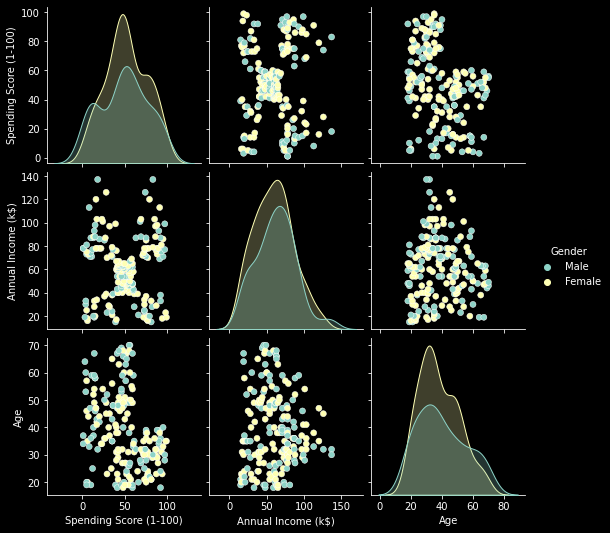

In [18]:
sb.pairplot(df, vars=['Spending Score (1-100)','Annual Income (k$)','Age'], hue="Gender")

**Customer Segmentation**

In [19]:
income_score = df.iloc[:,[False,False,False,True,True]].values
scaler = MinMaxScaler()
scaled_income_score = scaler.fit_transform(income_score)

**Elbow Method**

In [20]:
elbow = []
k = range(1,10)
for i in k:
  KModel = KMeans(n_clusters=i, init='k-means++')
  KModel.fit(scaled_income_score)
  elbow.append(KModel.inertia_)

px.line(k,elbow,template="plotly_dark", labels={"x":"Number of Clusters", "y":"Distortion"}, title="Elboe Method")

**Silhouette Method**

In [25]:
silhouette_score(income_score,KModel.labels_)

0.4534096564225548

In [63]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(income_score) for k in range(1,10)]
silhouette_scores =[silhouette_score(income_score, model.labels_) for model in kmeans_per_k[1:]]

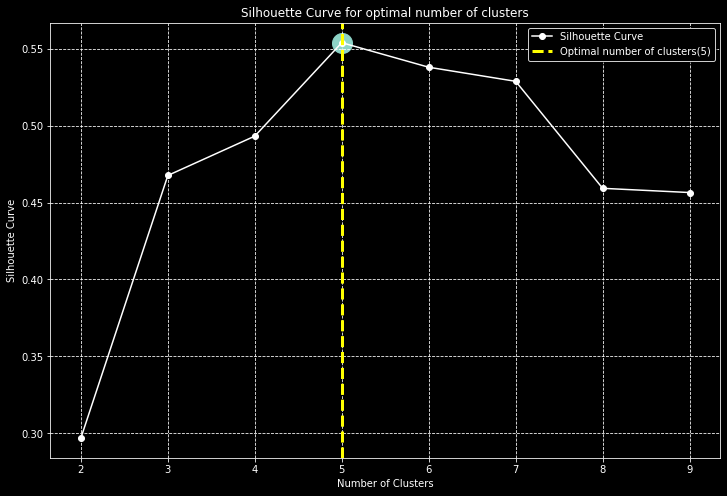

In [69]:
plt.figure(figsize=(12,8))
plt.plot(range(2,10), silhouette_scores,"bo-", color="white", label='Silhouette Curve')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Curve")
plt.grid(linestyle='--')
plt.title("Silhouette Curve for optimal number of clusters")

k = np.argmax(silhouette_scores)+2

plt.axvline(x=k, c="yellow", linestyle='--', linewidth=3, label='Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scores[k-2], s=400)
plt.legend(shadow=True)
plt.show()

In [71]:
print("Optimal number of cluster is : {}".format(k))

Optimal number of cluster is : 5


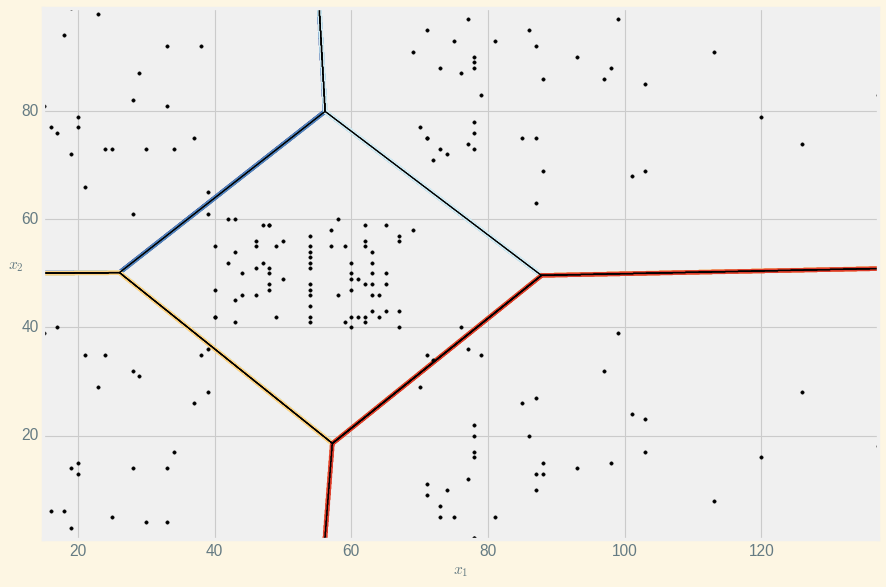

In [138]:
plt.figure(figsize=(12,8))
def decision_boundaries(clusterer, x, resolution = 2000, show_centroids = True, show_xlabels = True, show_ylabels = True, shadow=True):
  mins = income_score.min(axis=0) - 0.1
  maxs = income_score.max(axis=0) + 0.1
  plt.style.use("fivethirtyeight")

  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='RdYlBu_r')
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
  plot_data(income_score)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)
  if show_xlabels:
    plt.xlabel("$x_1$", fontsize=14)
  else:
    plt.tick_params(labelbottom=False)  
  if show_ylabels:
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
  else:
    plt.tick_params(labelleft=False)  


def plot_data(income_score):
  plt.plot(income_score[:,0], income_score[:,1], 'k.')

def plot_centroids(centroids, weights=None, circle_color='red', cross_color='k', shadow=True):
  if weights is not None:
    centroids = centroids[weights>weights.max() / 10]
    plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=50, linewidths=9 ,color=circle_color, zorder = 10, alpha=0.9, shadow=True)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=80,linewidths=60, color=cross_color, zorder = 11, alpha=1, shadow=True)


decision_boundaries(kmeans_per_k[k-1], income_score)

plt.show()

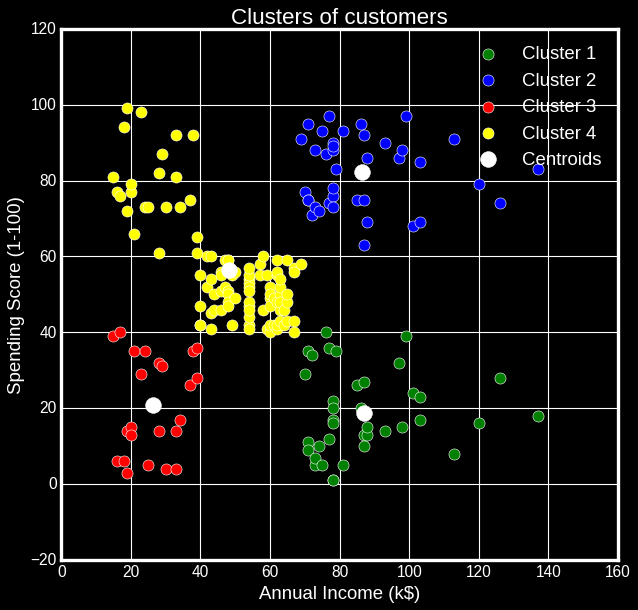

In [131]:
kmeanModel = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans= kmeanModel.fit_predict(income_score)
plt.figure(figsize=(8,8))
plt.scatter(income_score[y_kmeans == 0, 0], income_score[y_kmeans == 0, 1], s = 100, c = 'g', label = 'Cluster 1')
plt.scatter(income_score[y_kmeans == 1, 0], income_score[y_kmeans == 1, 1], s = 100, c = 'b', label = 'Cluster 2')
plt.scatter(income_score[y_kmeans == 2, 0], income_score[y_kmeans == 2, 1], s = 100, c = 'r', label = 'Cluster 3')
plt.scatter(income_score[y_kmeans == 3, 0], income_score[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:, 1], s = 200, c = 'white', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()